In [ ]:
import pathlib
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
work_path1 = pathlib.Path.cwd()

data_path1 = Path(work_path1, 'data_one_hot_undersampling.csv')
train_data = pd.read_csv(data_path1)
train_data.shape

(107540, 218)

In [ ]:
train_data = train_data.drop(columns = ['SK_ID_CURR'])

In [ ]:
test_data_null = train_data['TARGET']
test_data_null.shape

(107540,)

In [ ]:
test_features = ['TARGET']
train_features = [item for item in train_data.columns if item not in test_features]
train_data_null = train_data[train_features]
train_data_null

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y
0,1,157500.0,418500.0,44536.5,418500.0,0.035792,-13275,-669,-611.0,-4737,...,0,0,0,1,0,0,1,0,1,1
1,0,126000.0,760225.5,32337.0,679500.0,0.007305,-17309,-1540,-8639.0,-842,...,0,0,0,1,0,0,1,0,1,0
2,0,112500.0,450000.0,20979.0,450000.0,0.018801,-17329,-946,-1743.0,-874,...,0,0,0,0,1,0,1,0,0,1
3,1,225000.0,540000.0,27000.0,540000.0,0.024610,-15806,-3535,-5303.0,-535,...,0,1,0,0,0,0,1,0,1,1
4,1,67500.0,180000.0,9000.0,180000.0,0.019689,-15030,-602,-1111.0,-4393,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107535,0,495000.0,1350000.0,90715.5,1350000.0,0.026392,-20464,365243,-417.0,-3773,...,0,0,0,1,0,0,1,0,0,1
107536,0,135000.0,670500.0,26109.0,670500.0,0.028663,-15023,-2458,-4681.0,-3989,...,0,0,0,1,0,0,1,0,1,0
107537,0,202500.0,755190.0,36459.0,675000.0,0.003541,-10037,-395,-8611.0,-2703,...,0,0,0,1,0,0,1,0,0,0
107538,0,135000.0,852088.5,43636.5,688500.0,0.016612,-9957,-757,-8.0,-2628,...,0,0,0,0,1,0,1,0,1,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train_null, X_test_null, y_train_null, y_test_null = train_test_split(
    train_data_null, test_data_null, random_state=29
)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)

model.fit(X_train_null, y_train_null)

y_pred = model.predict(X_test_null)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

print('F1 score:', f1_score(y_test_null, y_pred))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred))
print('precision_score:', precision_score(y_test_null, y_pred))
print('recall_score:', recall_score(y_test_null, y_pred))

F1 score: 0.17777170944838885
roc_auc_score: 0.5426379780586016
precision_score: 0.636986301369863
recall_score: 0.10330053951126626


In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores = feature_scores[:20]

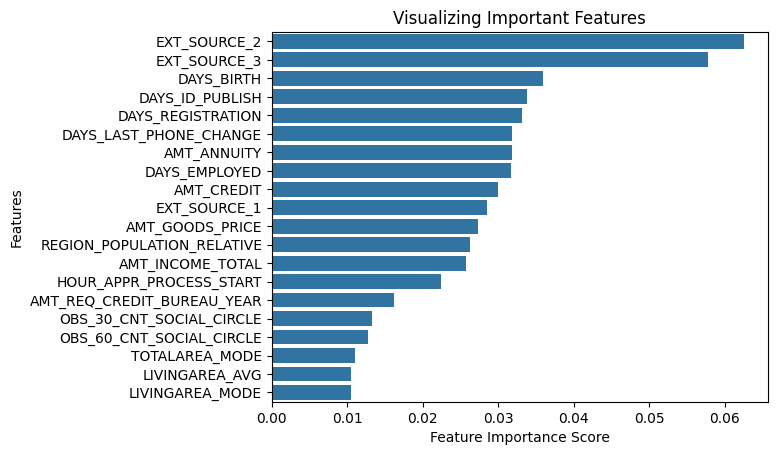

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

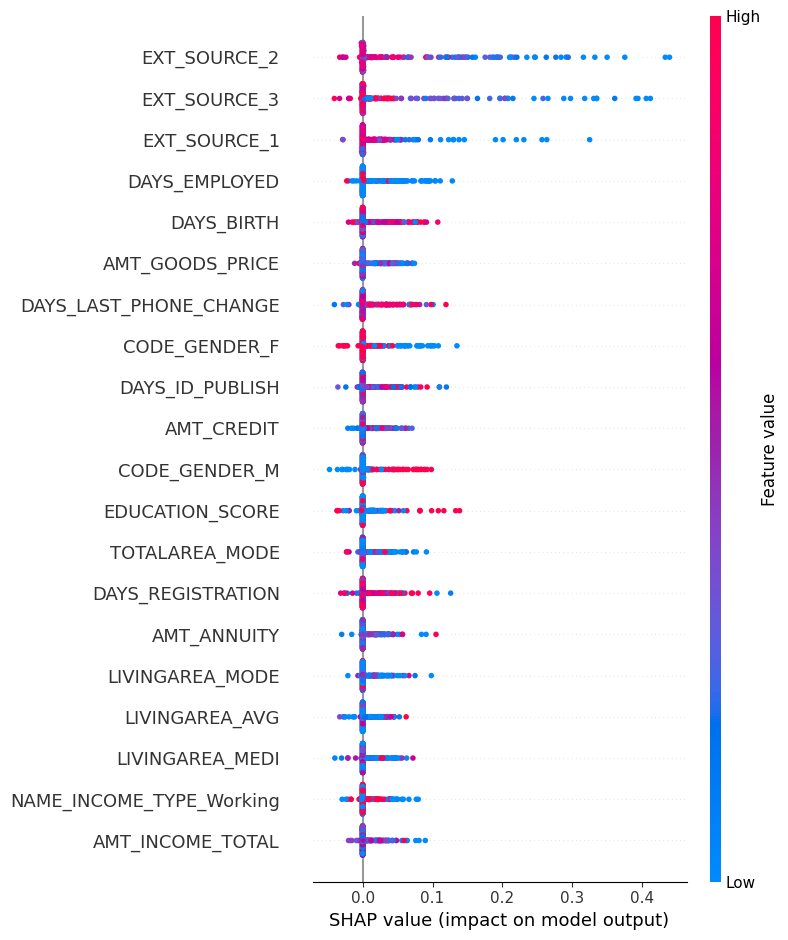

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_null, y_train_null)

y_pred_xgb = model_xgb.predict(X_test_null)

In [ ]:
print('F1 score:', f1_score(y_test_null, y_pred_xgb))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred_xgb))
print('precision_score:', precision_score(y_test_null, y_pred_xgb))
print('recall_score:', recall_score(y_test_null, y_pred_xgb))

F1 score: 0.35701715794104705
roc_auc_score: 0.6004200076497487
precision_score: 0.5817204301075268
recall_score: 0.2575372897492859


In [ ]:
feature_scores_xgb = pd.Series(model_xgb.feature_importances_, index=X_train_null.columns).sort_values(ascending=False)

feature_scores_xgb = feature_scores_xgb[:20]

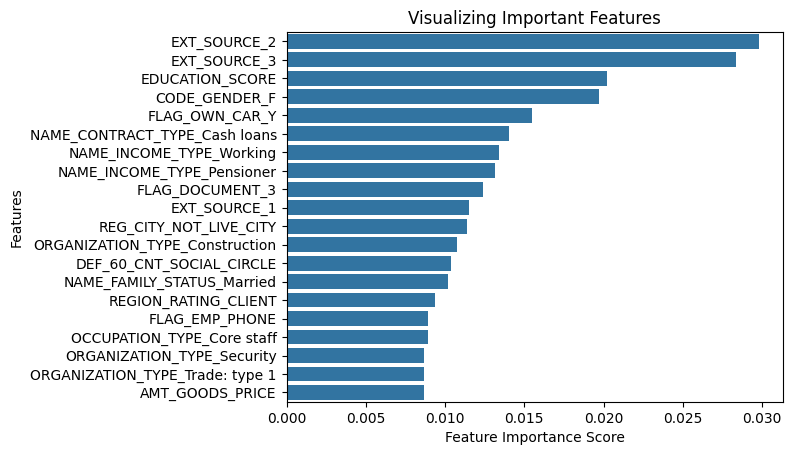

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores_xgb, y=feature_scores_xgb.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

  0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


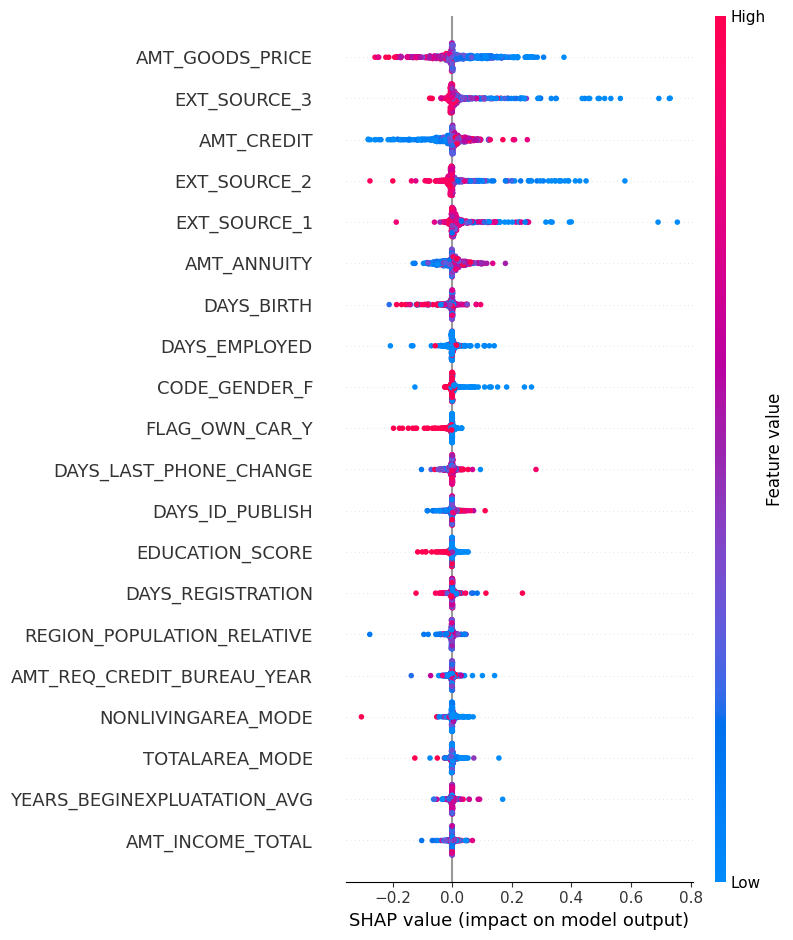

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model_xgb.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='newton-cholesky')
lr_clf.fit(X_train_null, y_train_null)

y_pred_lr = lr_clf.predict(X_test_null)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.21494e-18): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [ ]:
print('F1 score:', f1_score(y_test_null, y_pred_lr))
print('roc_auc_score:', roc_auc_score(y_test_null, y_pred_lr))
print('precision_score:', precision_score(y_test_null, y_pred_lr))
print('recall_score:', recall_score(y_test_null, y_pred_lr))

F1 score: 0.0006341154090044388
roc_auc_score: 0.5000615122187289
precision_score: 0.3333333333333333
recall_score: 0.00031735956839098697


<Axes: ylabel='Feature'>

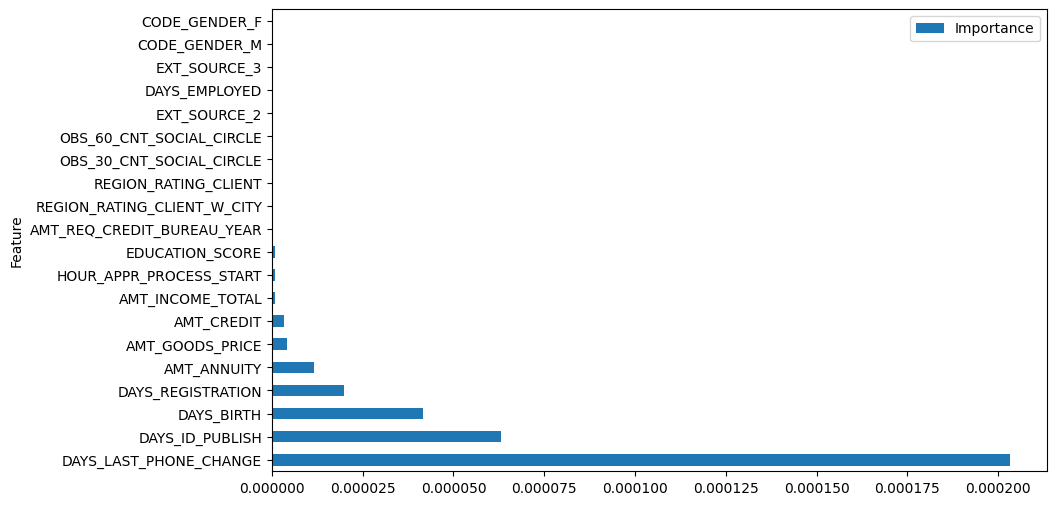

In [ ]:
coefficients = lr_clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train_null.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance[:20]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


  0%|          | 0/400 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

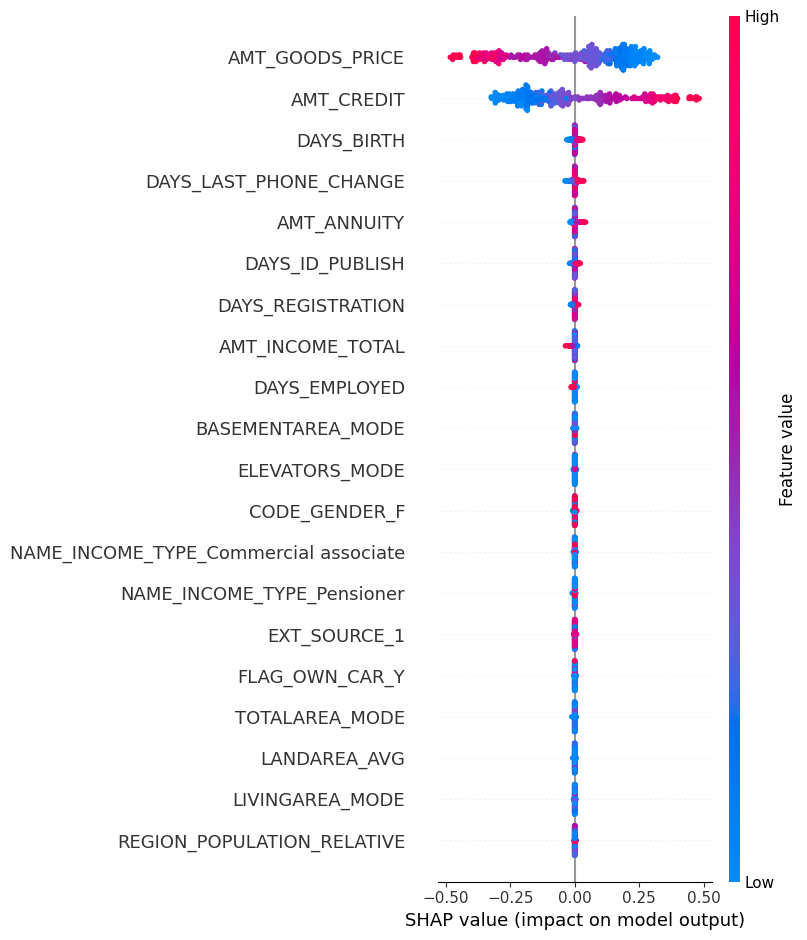

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return lr_clf.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)

**Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [ ]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='relu'
output_layer_act='sigmoid'
no_epochs=7

In [ ]:
model_nn = Sequential()

In [ ]:
model_nn.add(Dense(hidden_units, input_dim=216, activation=hidden_layer_act))
model_nn.add(Dense(hidden_units, activation=hidden_layer_act))
model_nn.add(Dense(1, activation=output_layer_act))

In [ ]:
from keras import backend as K

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
sgd=optimizers.Adam()
model_nn.compile(loss='binary_crossentropy',optimizer=sgd, metrics=[recall_m, precision_m, f1_m])

In [ ]:
model_nn.fit(X_train_null, y_train_null, epochs=no_epochs, batch_size=len(X_train_null),  verbose=2)

Epoch 1/7
1/1 - 3s - loss: 10749.8428 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 2/7
1/1 - 2s - loss: 10046.8076 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 3/7
1/1 - 2s - loss: 8979.5498 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 4/7
1/1 - 2s - loss: 7615.0278 - recall_m: 7.5602e-04 - precision_m: 0.2593 - f1_m: 0.0015 - 2s/epoch - 2s/step
Epoch 5/7
1/1 - 2s - loss: 6008.3721 - recall_m: 0.0071 - precision_m: 0.2312 - f1_m: 0.0138 - 2s/epoch - 2s/step
Epoch 6/7
1/1 - 2s - loss: 4226.0869 - recall_m: 0.0251 - precision_m: 0.2248 - f1_m: 0.0451 - 2s/epoch - 2s/step
Epoch 7/7
1/1 - 2s - loss: 2394.2961 - recall_m: 0.0916 - precision_m: 0.2507 - f1_m: 0.1342 - 2s/epoch - 2s/step


In [ ]:
predictions = model_nn.predict(X_test_null)

841/841 [==============================] - 1s 1ms/step


In [ ]:
rounded = [int(round(x[0])) for x in predictions]
print(rounded)

[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score


In [ ]:
print('F1 score:', f1_score(y_test_null, rounded))
print('roc_auc_score:', roc_auc_score(y_test_null, rounded))
print('precision_score:', precision_score(y_test_null, rounded))
print('recall_score:', recall_score(y_test_null, rounded))

F1 score: 0.3529288593414647
roc_auc_score: 0.5383822406738834
precision_score: 0.2633388016561206
recall_score: 0.5349095525230085


1/1 [==============================] - 0s 60ms/step


  0%|          | 0/400 [00:00<?, ?it/s]

1363/1363 [==============================] - 2s 2ms/step


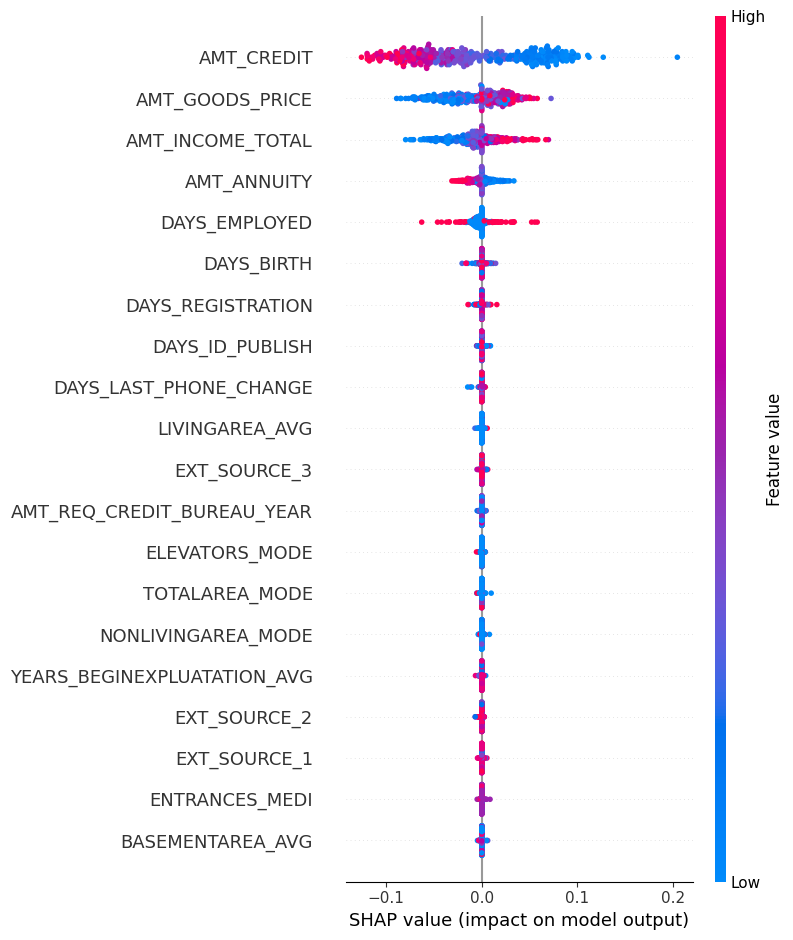

In [ ]:
import shap

# SHAP expects model functions to take a 2D numpy array as input, so we define a wrapper function around the original Keras predict function.
def f_wrapper(X):
    return model_nn.predict(X).flatten()

# Too many input data - use a random slice
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train_null, 20)

# Compute Shap values
explainer = shap.KernelExplainer(f_wrapper,X_train_summary)

# Make plot with combined shap values
# The training set is too big so let's sample it. We get enough point to draw conclusions
X_train_sample = X_train_null.sample(400)
shap_values  = explainer.shap_values(X_train_sample)
shap.summary_plot(shap_values, X_train_sample)